<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Compute Average Using ReduceByKey

- https://stackoverflow.com/questions/40087483/spark-average-of-values-instead-of-sum-in-reducebykey-using-scala/40101724?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
- https://stackoverflow.com/questions/29930110/calculating-the-averages-for-each-key-in-a-pairwise-k-v-rdd-in-spark-with-pyth?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

<img src="image1.png",width="500", height="500",embed=True>

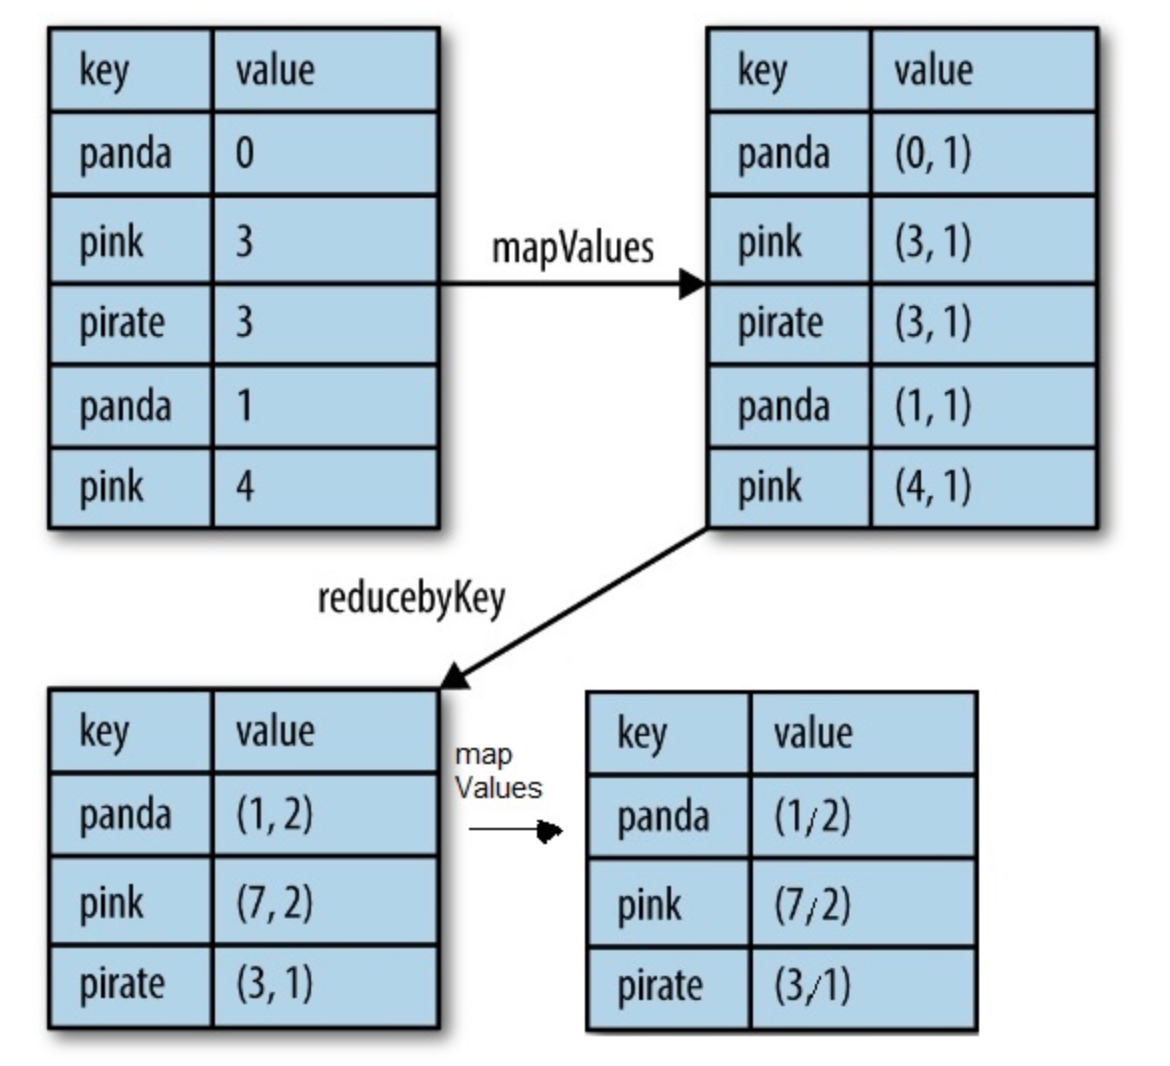

In [12]:
from IPython.display import Image
Image(filename='image1.png',width=500,height=500,embed=True)

In [ ]:
# ![](image1.png)

In [2]:
import findspark
findspark.find() 

from pyspark import SparkContext
sc =SparkContext()

In [12]:
# sample data 
rdd = sc.parallelize([['key1',1],['key1',2],['key1',5],['key2',4],['key2',9]])
rdd.collect()

[['key1', 1], ['key1', 2], ['key1', 5], ['key2', 4], ['key2', 9]]

In [13]:
# step 1 
rdd.mapValues(lambda x: (x,1)).collect()

[('key1', (1, 1)),
 ('key1', (2, 1)),
 ('key1', (5, 1)),
 ('key2', (4, 1)),
 ('key2', (9, 1))]

In [19]:
# step 2 
# a: sums up values 
# b: gets total count 
rdd.mapValues(lambda x: (x,1))\
    .reduceByKey(lambda a,b: (a[0]+b[0], a[1]+b[1])).collect()

[('key1', (8, 3)), ('key2', (13, 2))]

In [20]:
# step 3 - average 
rdd.mapValues(lambda x: (x,1))\
    .reduceByKey(lambda a,b: (a[0]+b[0], a[1]+b[1]))\
    .mapValues(lambda v: v[0]/v[1]).collect()

[('key1', 2.6666666666666665), ('key2', 6.5)]